<a href="https://colab.research.google.com/github/nurniahamid/ML_Pemula/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Nurnia_Hamid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Submission ML Pemula/Clustering/data_clustering_kmeans.csv')
df.head()

,Customer_ID,Total_MonetaryValue,Total_Quantity,Order_Frequency,Favorite_Category,favorite_Region,Customer_Type,Log_Total_MonetaryValue,Log_Total_Quantity,Cluster_KMeans,PCA1,PCA2
0,CUS1,38904.13,7508,305,Soft Drinks,Mecklenburg-Vorpommern,B2C,10.568881,8.923858,2,-1.050327,0.387273
1,CUS10,40288.83,6910,296,Water,Saarland,B2C,10.603854,8.840870,0,-1.135444,-0.128648
2,CUS100,36039.74,7163,287,Soft Drinks,Bayern,B2C,10.492405,8.876824,0,-1.245678,-0.642564
3,CUS1000,271186.90,44318,289,Soft Drinks,Thüringen,B2B,12.510567,10.699169,3,1.866801,-0.811476
4,CUS10000,253436.72,46184,299,Juices,Sachsen,B2B,12.442873,10.740410,3,1.897211,-0.232318


In [ ]:
df_cleaned = df.drop(columns=['Log_Total_MonetaryValue','Log_Total_Quantity','PCA1','PCA2'])
df_cleaned.head()

,Customer_ID,Total_MonetaryValue,Total_Quantity,Order_Frequency,Favorite_Category,favorite_Region,Customer_Type,Cluster_KMeans
0,CUS1,38904.13,7508,305,Soft Drinks,Mecklenburg-Vorpommern,B2C,2
1,CUS10,40288.83,6910,296,Water,Saarland,B2C,0
2,CUS100,36039.74,7163,287,Soft Drinks,Bayern,B2C,0
3,CUS1000,271186.90,44318,289,Soft Drinks,Thüringen,B2B,3
4,CUS10000,253436.72,46184,299,Juices,Sachsen,B2B,3


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          10000 non-null  object 
 1   Total_MonetaryValue  10000 non-null  float64
 2   Total_Quantity       10000 non-null  int64  
 3   Order_Frequency      10000 non-null  int64  
 4   Favorite_Category    10000 non-null  object 
 5   favorite_Region      10000 non-null  object 
 6   Customer_Type        10000 non-null  object 
 7   Cluster_KMeans       10000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB


In [ ]:
df_cleaned.isnull().sum()

,0
Customer_ID,0
Total_MonetaryValue,0
Total_Quantity,0
Order_Frequency,0
Favorite_Category,0
favorite_Region,0
Customer_Type,0
Cluster_KMeans,0


In [ ]:
df.duplicated().sum()

np.int64(0)

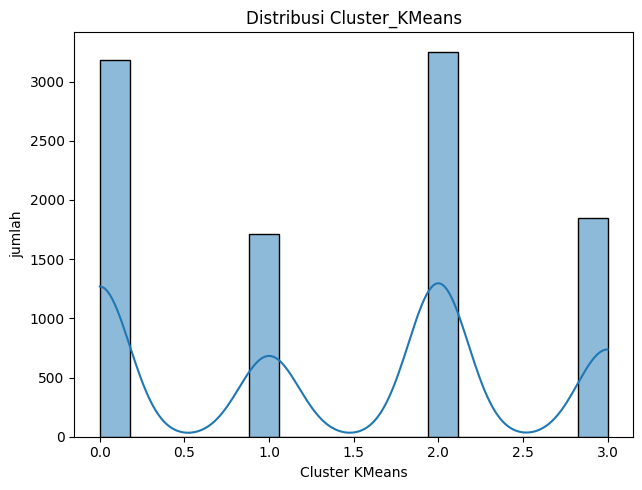

In [ ]:
#Distribusi fitur numerik

numerical_features = ['Cluster_KMeans']
plt.figure(figsize=(18,5))
for i, feature in enumerate(numerical_features):
  plt.subplot(1, 3, i + 1)
  sns.histplot(df_cleaned[feature], kde=True)
  plt.title(f'Distribusi {feature}', fontsize=12)
  plt.xlabel(feature.replace('_',' '))
  plt.ylabel('jumlah')

plt.tight_layout()
plt.show()


Label Encoder


In [ ]:
Label_encoder = LabelEncoder()
categorical_columns = ['Favorite_Category', 'favorite_Region', 'Customer_Type' ]
for column in categorical_columns:
  df_cleaned[column] = Label_encoder.fit_transform(df_cleaned[column])

df_cleaned.head()

,Customer_ID,Total_MonetaryValue,Total_Quantity,Order_Frequency,Favorite_Category,favorite_Region,Customer_Type,Cluster_KMeans
0,CUS1,38904.13,7508,305,2,7,1,2
1,CUS10,40288.83,6910,296,3,11,1,0
2,CUS100,36039.74,7163,287,2,1,1,0
3,CUS1000,271186.90,44318,289,2,15,0,3
4,CUS10000,253436.72,46184,299,1,12,0,3


# **3. Data Splitting**

In [ ]:
classify_feature = ['Total_MonetaryValue', 'Total_Quantity', 'Order_Frequency',
                     'Favorite_Category', 'favorite_Region', 'Customer_Type']
classify_target = ['Cluster_KMeans']

X = df_cleaned[classify_feature]
y = df_cleaned[classify_target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print('Ukuran X_train:', X_train.shape)
print('Ukuran X_test:', X_test.shape)
print('Distribusi y_train:\n', y_train.value_counts(normalize=True))

Ukuran X_train: (8000, 6)
Ukuran X_test: (2000, 6)
Distribusi y_train:
 Cluster_KMeans
2                 0.325250
0                 0.318375
3                 0.185000
1                 0.171375
Name: proportion, dtype: float64


- X_train : 8000 baris data untuk melatih model dengan 6 fitur
- X_test : 2000 baris data untuk melatih model dengan 6 fitur

# **4. Membangun Model Klasifikasi**

## **a. Membangun Model Klasifikasi**


In [ ]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print('Model training selesai')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model training selesai


## **b. Evaluasi Model Klasifikasi**

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results
results = {
    'Decision Tree (DT)': evaluate_model(dt_model, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf_model, X_test, y_test)
}

# Buat ringkasan ke dalam DataFrame
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)
print(summary_df)


                Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree (DT)    0.9995   0.999501  0.9995    0.9995
1  Random Forest (RF)    0.9985   0.998507  0.9985    0.9985


In [ ]:
print(X_train.columns)


Index(['Total_MonetaryValue', 'Total_Quantity', 'Order_Frequency',
       'Favorite_Category', 'favorite_Region', 'Customer_Type'],
      dtype='object')


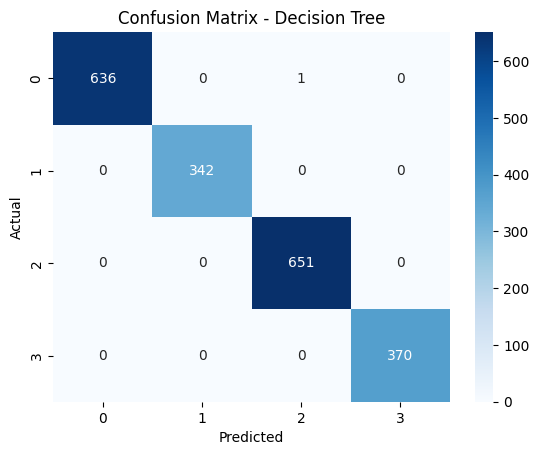

In [ ]:
sns.heatmap(results['Decision Tree (DT)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

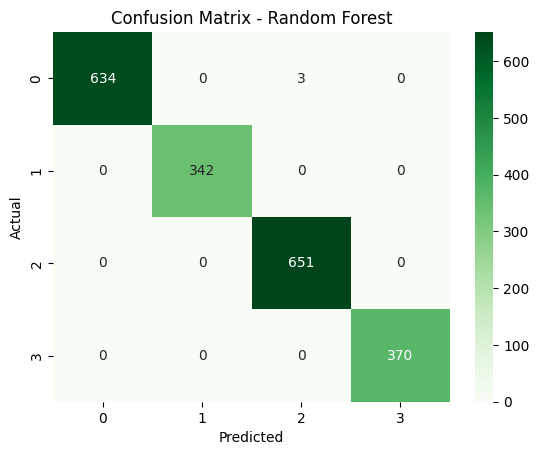

In [ ]:
sns.heatmap(results['Random Forest (RF)']['Confusion Matrix'], annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **c. Analisis Hasil Evaluasi Model Klasifikasi**


**Tidak melakukan tuning, karean tuning belum diperlukan karena hasil akurasi sudah bagus**

**1. Perbandingan Hasil Evaluasi**
Decision Tree (DT) :
- Accuracy : 0.9995
- Precision : 0.9995
- Recall : 0.9995
- F1-Score : 0.9995

Random Forest (RF) :
- Accuracy : 0.9985
- Precision : 0.9985
- Recall : 0.9985
- F1-Score : 0.9985

- Kedua model sangat akurat dan konsisten.
- Tidak performa yang rendah, semua metrik tinggi dan stabil.
- Tidak dilakukan tuning, tapi hasil default saja sudah sangat bagus.

**2. Apakah ada Masalah Overvitting atau Undervitting**
sejauh ini belum ada indikasi kuat overvitting atau undervitting

**3. Identifikasi Model**
**Decision Tree :**
- Semua kelas diprediksi dengan sangat akurat.
- Hanya ada 1 kesalahan prediksi di kelas 0 yang diprediksi sebagai kelas 2.
- Tidak ada kesalahan untuk kelas 1, 2, dan 3 sama sekali.

**Random Forest:**
- Semua kelas diprediksi dengan sangat akurat
- Terdapat 3 kesalahan prediksi pada kelas 0, yang diprediksi sebagai kelas 2
- Tidak ada kesalahan prediksi untuk kelas 1, 2, dan 3, artinya semua instance di kelas tersebut berhasil diprediksi dengan akurasi sempurna

**Rekomendasi:**
karena hasilnya bagus maka bisa lanjut pakai modelnya untuk deployment/pemanfaatan